<a href="https://colab.research.google.com/github/Abdul8189/datascience/blob/main/Machine_learning(scikt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
dataset=pd.read_csv('loan_data.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dataset.select_dtypes(include='float64').columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [ ]:
si=SimpleImputer(strategy='mean')
ar=si.fit_transform(dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [ ]:
newdataset=pd.DataFrame(ar,columns=dataset.select_dtypes(include='float64').columns)

In [ ]:
newdataset.isnull().sum()

,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# encoding
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)


/tmp/ipython-input-956349023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)


In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

/tmp/ipython-input-568568310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)


In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
en_data=dataset[['Gender','Married']]
pd.get_dummies(en_data)

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [ ]:
ohe=OneHotEncoder()
ohe.fit_transform(en_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1228 stored elements and shape (614, 4)>

In [ ]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [ ]:
ars=ohe.fit_transform(en_data).toarray()

In [ ]:
pd.DataFrame(ars,columns=['Gender_Female','Gender_Male','Married_No','Married_Yes'])

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
609,1.0,0.0,1.0,0.0
610,0.0,1.0,0.0,1.0
611,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0


In [ ]:
# label encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()
lb.fit_transform(dataset['Property_Area'])

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

In [ ]:
dataset['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
dataset['Property_Area']=lb.fit_transform(dataset['Property_Area'])

In [ ]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y


In [ ]:
# ordinalencoding
df=pd.DataFrame({"size":['s','l','m','xl','s','l','m','xl']})
df.head(4)

,size
0,s
1,l
2,m
3,xl


In [ ]:
ord_data=[['s','l','m','xl']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
odl=OrdinalEncoder(categories=ord_data)
odl.fit(df[['size']])

OrdinalEncoder(categories=[['s', 'l', 'm', 'xl']])

In [ ]:
odl.fit_transform(df)

array([[0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [1.],
       [2.],
       [3.]])

In [ ]:
df['size_en']=odl.fit_transform(df)
df.head(3)

,size,size_en
0,s,0.0
1,l,1.0
2,m,2.0


In [ ]:
# using map
ord_data1={'s':1,'m':2,"l":3,'xl':4}

In [ ]:
df["size_map"]=df["size"].map(ord_data1)

In [ ]:
df.head(4)

,size,size_en,size_map
0,s,0.0,1
1,l,1.0,3
2,m,2.0,2
3,xl,3.0,4


In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
edu1={'Graduate':'A','Not Graduate':'B'}

In [ ]:
dataset['enpedu']=dataset['Education'].map(edu1)

In [ ]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enpedu
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,A
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,A
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,A


In [ ]:
# outliers
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


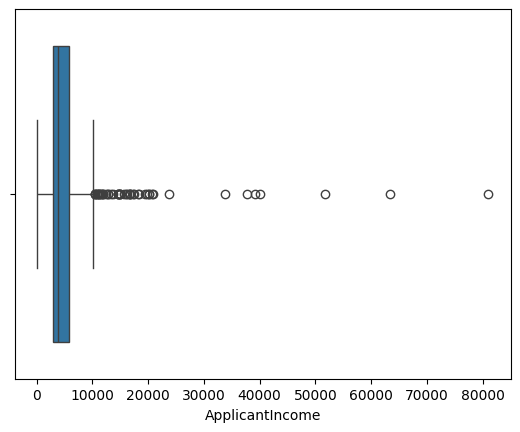

In [ ]:
sns.boxplot(x='ApplicantIncome',data=dataset)
plt.show()

/tmp/ipython-input-1976060950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


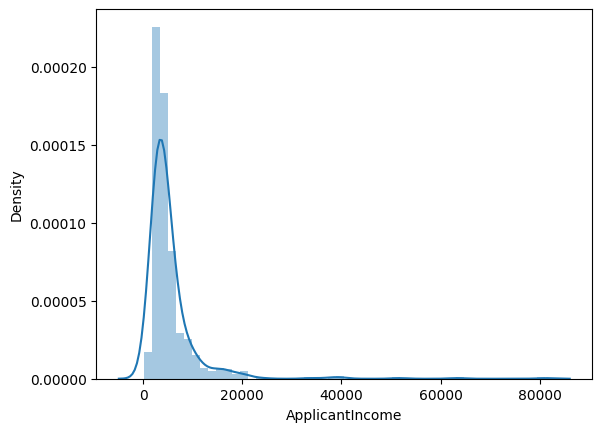

In [ ]:
sns.distplot(dataset['ApplicantIncome'])
plt.show()

In [ ]:
l=[1,3,4,5,6,7,8,9,3,3,22,4,5]
np.mean(l)

np.float64(6.153846153846154)

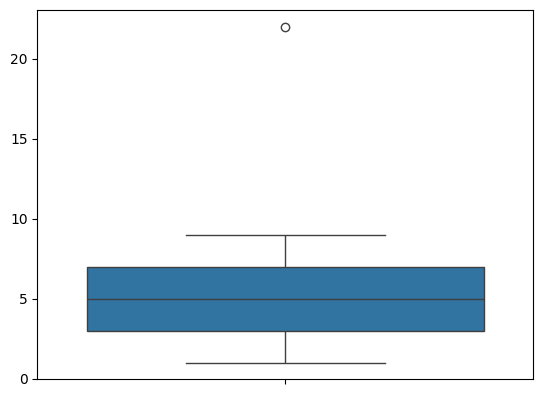

In [ ]:
sns.boxplot(l)
plt.show()

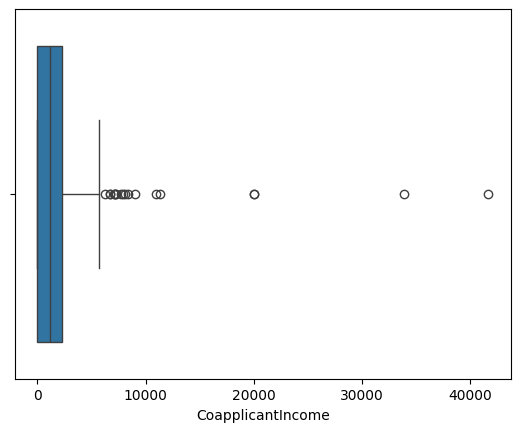

In [ ]:
# removingoutlairs though IQR methord
sns.boxplot(x='CoapplicantIncome',data=dataset)
plt.show()

In [ ]:
q1=dataset['CoapplicantIncome'].quantile(0.25)
q3=dataset['CoapplicantIncome'].quantile(0.75)
IQR=q3-q1
print(IQR)

2297.25


In [ ]:
min_r=q1-(1.5*IQR)
max_r=q3+(1.5*IQR)
min_r,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [ ]:
new_dataset=dataset[dataset['CoapplicantIncome']<=max_r]

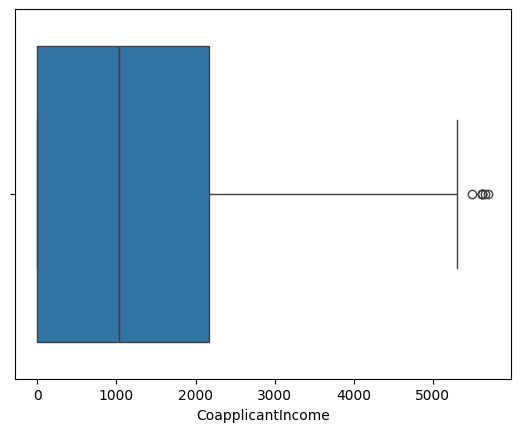

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,596.000000,596.00000,574.000000,582.00000,549.000000,596.000000
mean,5403.332215,1289.12906,142.871080,342.57732,0.843352,1.033557
std,6142.754002,1461.72508,81.169683,64.98370,0.363800,0.787858
min,150.000000,0.00000,9.000000,12.00000,0.000000,0.000000
25%,2894.750000,0.00000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1031.00000,126.000000,360.00000,1.000000,1.000000
75%,5754.500000,2173.00000,161.750000,360.00000,1.000000,2.000000
max,81000.000000,5701.00000,700.000000,480.00000,1.000000,2.000000


In [ ]:
sns.boxplot(x='CoapplicantIncome',data=new_dataset)
plt.show()
new_dataset.describe()

In [ ]:
new_dataset.shape

(596, 14)

/tmp/ipython-input-3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


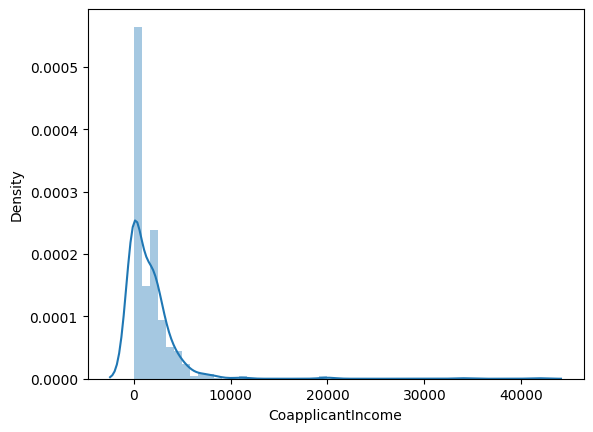

In [ ]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [ ]:
min_rd=(dataset['CoapplicantIncome'].mean())-(3*dataset['CoapplicantIncome'].std())
max_rd=(dataset['CoapplicantIncome'].mean())+(3*dataset['CoapplicantIncome'].std())
min_rd,max_rd

(np.float64(-7157.499309645475), np.float64(10399.990905699677))

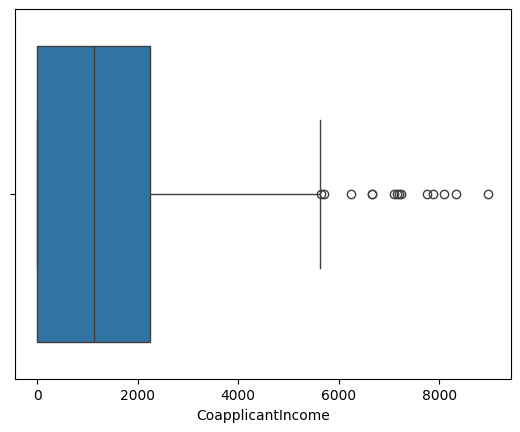

In [ ]:
new_d=dataset[dataset['CoapplicantIncome']<=max_rd]
sns.boxplot(x='CoapplicantIncome',data=new_d)
plt.show()

In [ ]:
z_score1=((dataset['CoapplicantIncome'])-(dataset['CoapplicantIncome'].mean()))/(dataset['CoapplicantIncome'].std())
z_score1

,CoapplicantIncome
0,-0.554036
1,-0.038700
2,-0.554036
3,0.251774
4,-0.554036
...,...
609,-0.554036
610,-0.554036
611,-0.472019
612,-0.554036


In [ ]:
dataset['z_datasc']=z_score1
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enpedu,z_datasc
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,A,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,A,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,A,-0.554036


In [ ]:
dataset[dataset['z_datasc']<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enpedu,z_datasc
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y,A,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,A,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y,A,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y,B,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y,A,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,Y,A,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,Y,A,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,Y,A,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,Y,A,-0.554036


In [ ]:
new_d.shape

(608, 14)